<a href="https://colab.research.google.com/github/saransh2396/Cardiovascular-Risk-Prediction/blob/main/8_dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting drive to load data 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from scipy import stats
import pylab

# Data Description

In [ ]:
#Loading the data
df = pd.read_csv('/content/drive/MyDrive/Cardiovascular Risk Prediction - Saransh Srivastava/data_cardiovascular_risk.csv',encoding= 'unicode_escape')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.shape

(3390, 17)

# Handling null values


In [ ]:
(df.isnull().sum()/len(df))*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

Filling the rows which has higher than 5% null and lower than 30% null values

In [ ]:
df['glucose'].fillna(value=df['glucose'].mode()[0],inplace=True)

Dropping the rows which has lower than 5% null values 

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
(df.isnull().sum()/len(df))*100

id                 0.0
age                0.0
education          0.0
sex                0.0
is_smoking         0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 1 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3189 non-null   int64  
 1   age              3189 non-null   int64  
 2   education        3189 non-null   float64
 3   sex              3189 non-null   object 
 4   is_smoking       3189 non-null   object 
 5   cigsPerDay       3189 non-null   float64
 6   BPMeds           3189 non-null   float64
 7   prevalentStroke  3189 non-null   int64  
 8   prevalentHyp     3189 non-null   int64  
 9   diabetes         3189 non-null   int64  
 10  totChol          3189 non-null   float64
 11  sysBP            3189 non-null   float64
 12  diaBP            3189 non-null   float64
 13  BMI              3189 non-null   float64
 14  heartRate        3189 non-null   float64
 15  glucose          3189 non-null   float64
 16  TenYearCHD       3189 non-null   int64  
dtypes: float64(9),

In [ ]:
df.drop(['id'],axis=1,inplace=True)

In [ ]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000
mean,49.423957,1.972719,9.098150,0.029476,0.005958,0.313264,0.025400,236.968642,132.436344,82.841173,25.774569,76.034180,81.364691,0.148950
std,8.556235,1.018435,11.864621,0.169164,0.076970,0.463894,0.157361,44.537998,22.176848,11.993650,4.132848,12.056788,23.173510,0.356095
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,22.940000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.370000,75.000000,77.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.500000,27.990000,83.000000,85.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.shape

(3189, 16)

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [ ]:
df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3384,61,1.0,1,0,0.0,0.0,0,1,0,217.0,154.0,86.0,26.980,88.8,92.0,0
3385,60,1.0,1,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.280,70.0,92.0,0
3386,46,1.0,1,0,0.0,0.0,0,0,0,199.0,111.5,71.0,21.960,80.0,84.0,0
3387,44,3.0,0,1,3.0,0.0,0,1,0,281.0,154.0,94.0,28.920,73.0,72.0,1
3389,54,3.0,1,0,0.0,0.0,0,0,0,281.0,124.0,77.0,29.576,79.0,92.0,0


###Target Variable

In [ ]:
df['TenYearCHD'].value_counts()

0    2714
1     475
Name: TenYearCHD, dtype: int64

TenYearCHD is the target variable

# EDA

In [ ]:
continuous_variables = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [ ]:
other_variables = ['education','sex','is_smoking','prevalentStroke','prevalentHyp','diabetes']

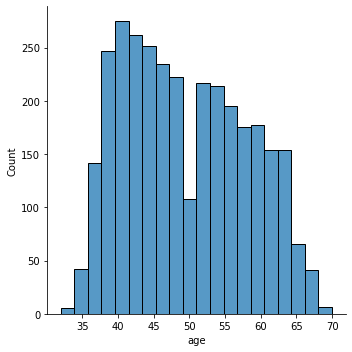

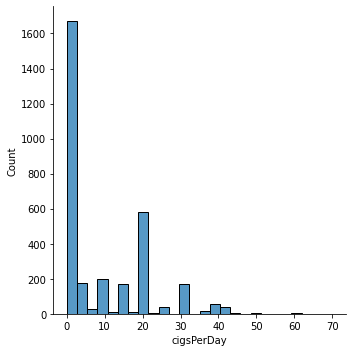

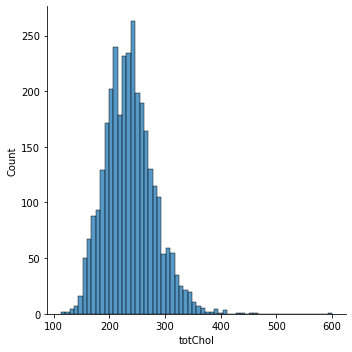

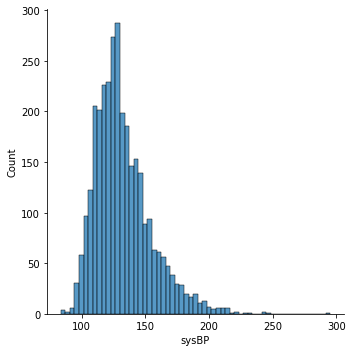

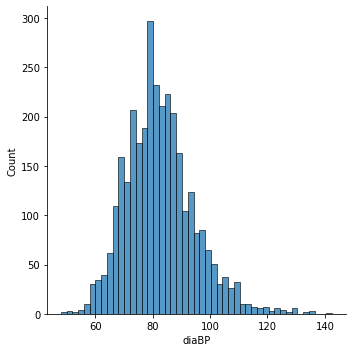

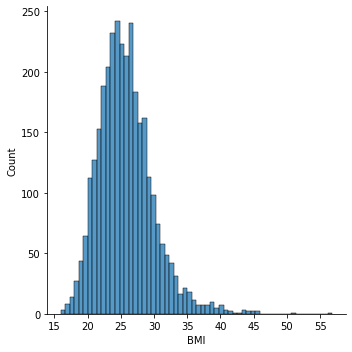

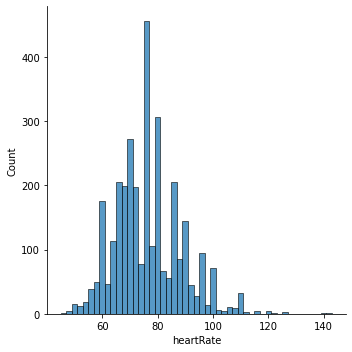

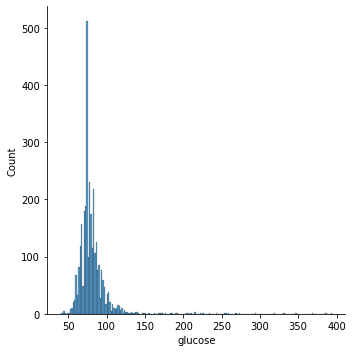

In [ ]:
for col in continuous_variables:
  sns.displot(df[col])
plt.show()

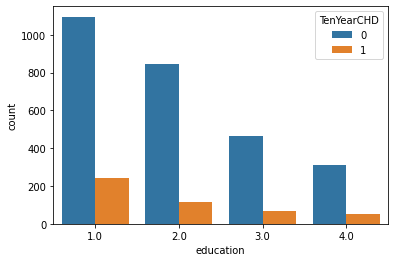

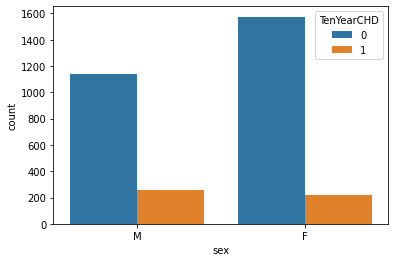

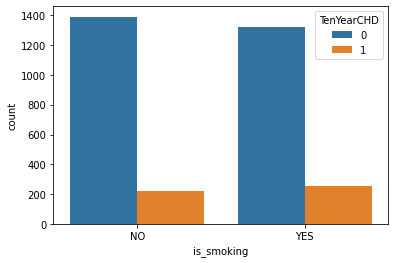

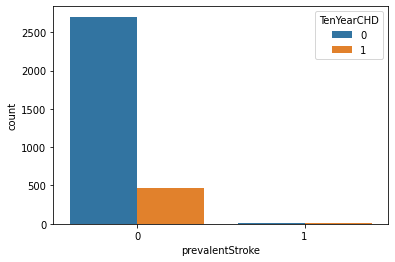

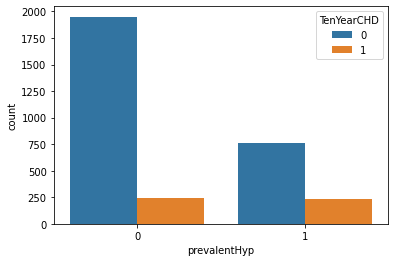

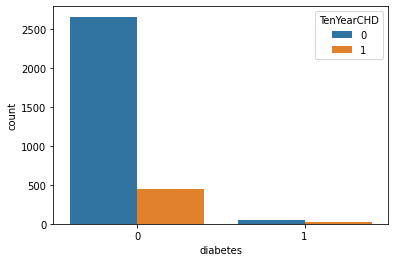

In [ ]:
for col in other_variables:
  sns.countplot(x=df[col],hue=df['TenYearCHD'],data=df)
  plt.show()

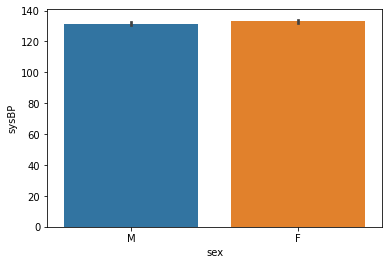

In [ ]:
sns.barplot(x=df['sex'],y=df['sysBP'],data=df)

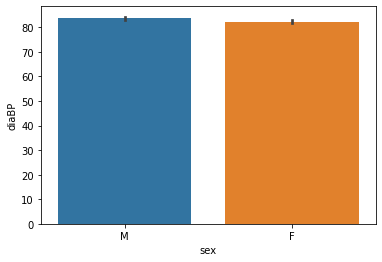

In [ ]:
sns.barplot(x=df['sex'],y=df['diaBP'],data=df)

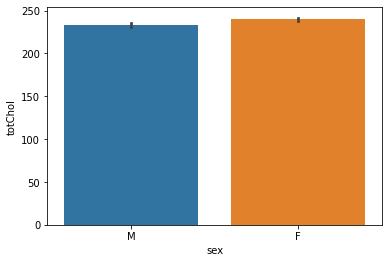

In [ ]:
sns.barplot(x=df['sex'],y=df['totChol'],data=df)

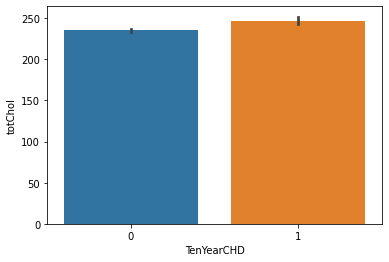

In [ ]:
sns.barplot(x=df['TenYearCHD'],y=df['totChol'],data=df)

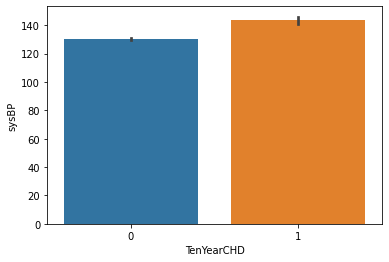

In [ ]:
sns.barplot(x=df['TenYearCHD'],y=df['sysBP'],data=df)

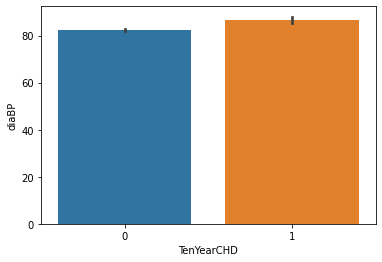

In [ ]:
sns.barplot(x=df['TenYearCHD'],y=df['diaBP'],data=df)

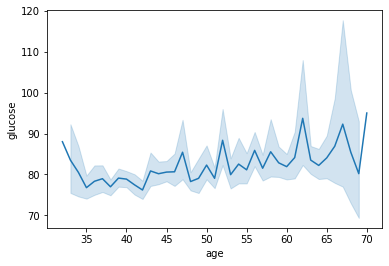

In [ ]:
sns.lineplot(x=df['age'],y=df['glucose'],data=df)

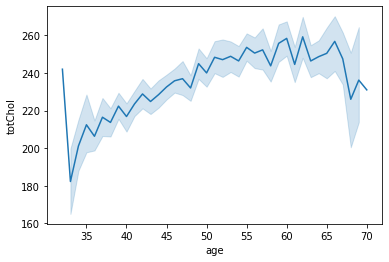

In [ ]:
sns.lineplot(x=df['age'],y=df['totChol'],data=df)

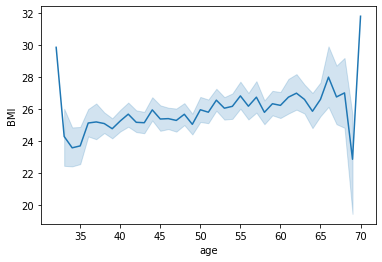

In [ ]:
sns.lineplot(x=df['age'],y=df['BMI'],data=df)

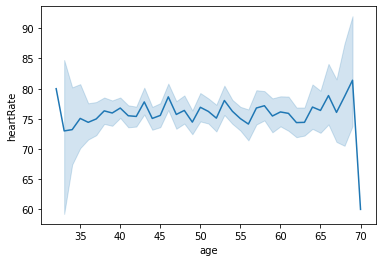

In [ ]:
sns.lineplot(x=df['age'],y=df['heartRate'],data=df)

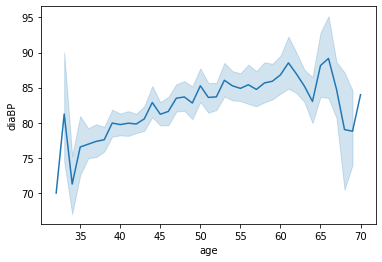

In [ ]:
sns.lineplot(x=df['age'],y=df['diaBP'],data=df)

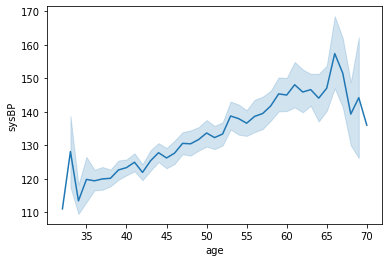

In [ ]:
sns.lineplot(x=df['age'],y=df['sysBP'],data=df)

# Handling Outliers

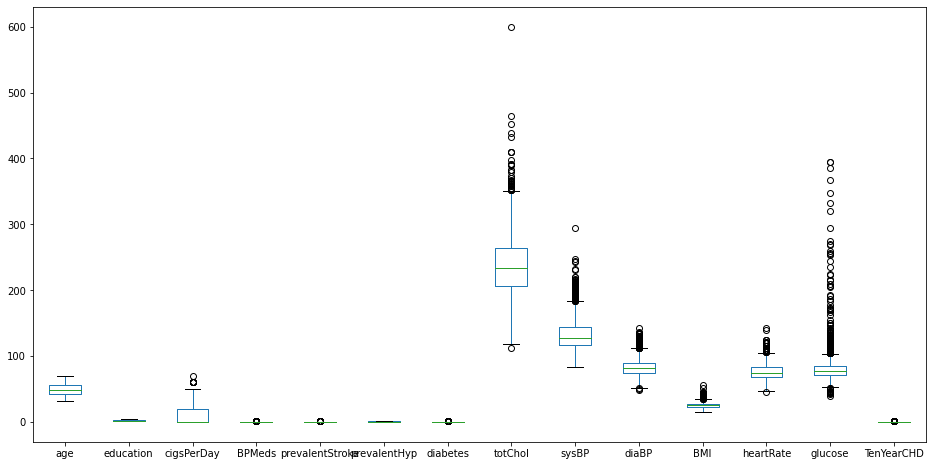

In [ ]:
df.plot(kind='box',figsize=(16,8))

In [ ]:
outlier_col = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

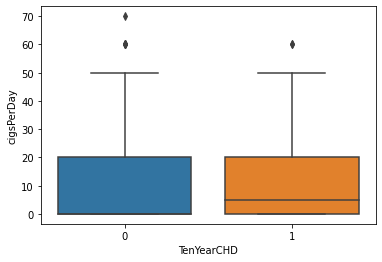

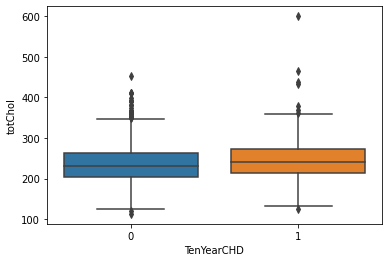

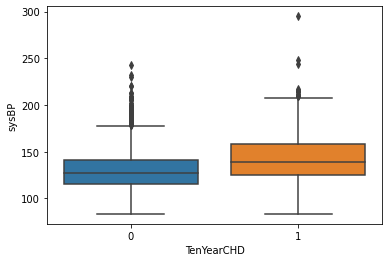

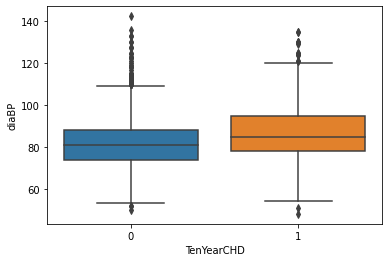

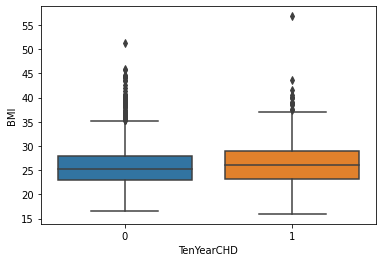

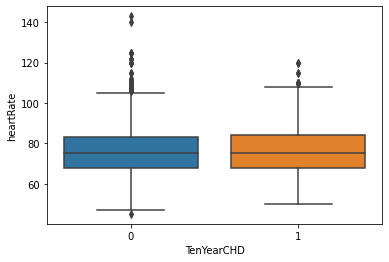

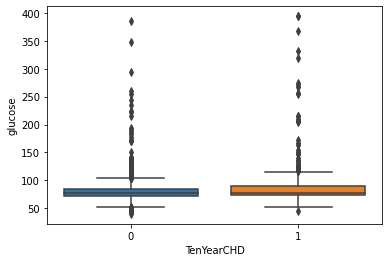

In [ ]:
for col in outlier_col:
  sns.boxplot(x=df['TenYearCHD'],y=df[col],data=df)
  plt.show()

In [ ]:
#Handling Outliers
df[outlier_col]=df[outlier_col].clip(lower=df[outlier_col].quantile(0.15),upper=df[outlier_col].quantile(0.85),axis=1)

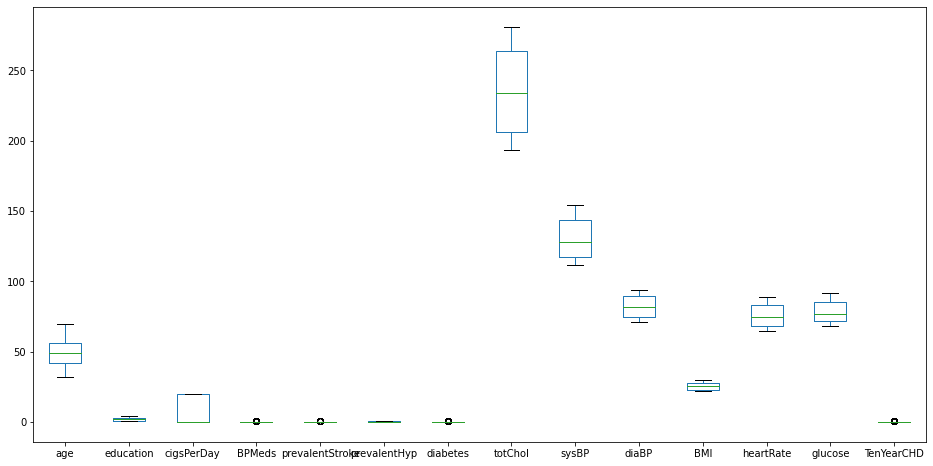

In [ ]:
df.plot(kind='box',figsize=(16,8))

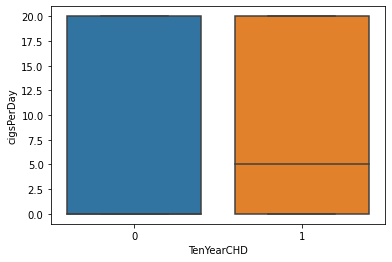

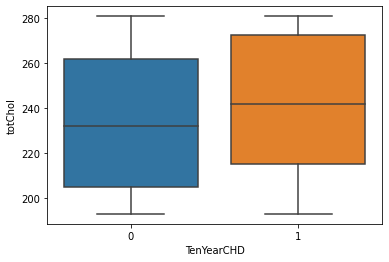

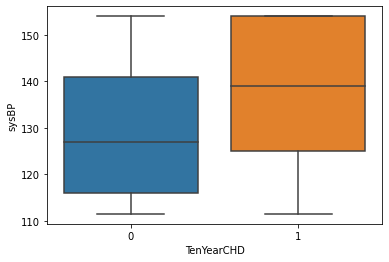

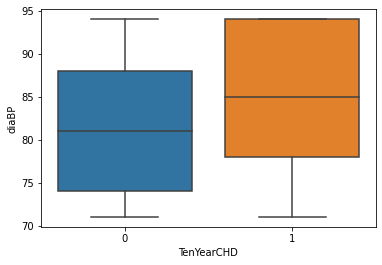

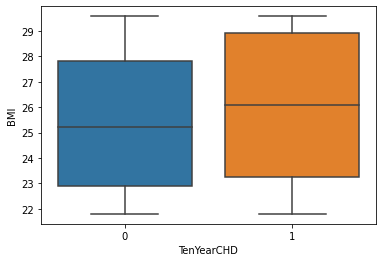

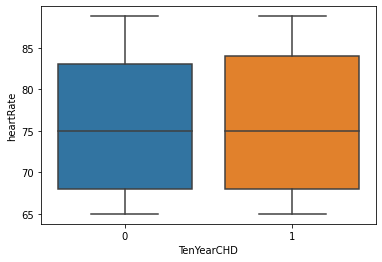

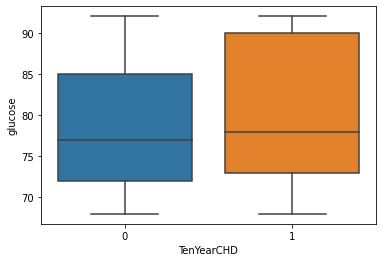

In [ ]:
for col in outlier_col:
  sns.boxplot(x=df['TenYearCHD'],y=df[col],data=df)
  plt.show()

# Multicollinearity

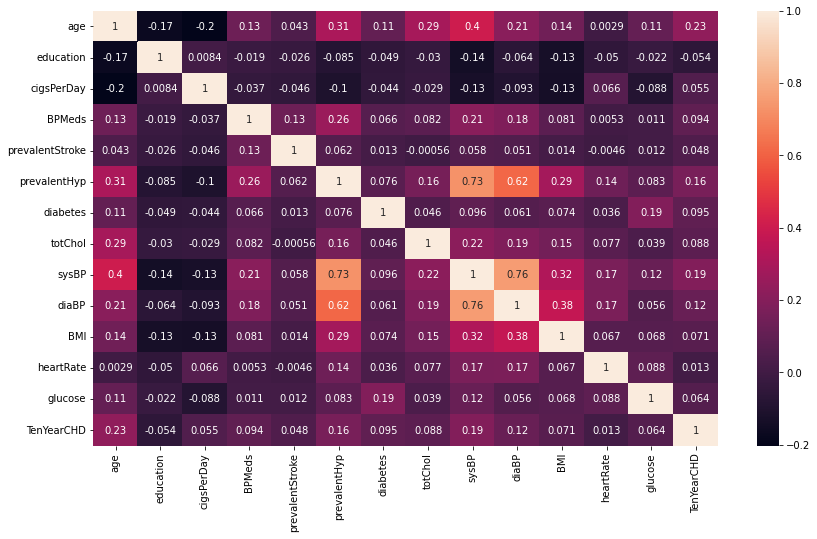

In [ ]:
# Heatmap:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
calc_vif(df[[i for i in df.describe().columns ]])

,variables,VIF
0,age,47.044314
1,education,4.796363
2,cigsPerDay,1.839989
3,BPMeds,1.130465
4,prevalentStroke,1.028448
5,prevalentHyp,2.555430
6,diabetes,1.070168
7,totChol,62.811486
8,sysBP,265.055672
9,diaBP,250.502661


sysBp means systolic blood pressure and diaBP means diastolic blood pressure are correalted to eaach other but we cannot drop these columns as 
Blood pressure is measured using two numbers: The first number, called systolic blood pressure, measures the pressure in your arteries when your heart beats. The second number, called diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.